##NullSeq2.0 is a python package that allowed the user to generate random coding DNA sequences with GC, amino acid, length and codon utilization constaints.
This tutorial will teach you how to use the package.
First, let's start by importing the package!

In [63]:
import sequence_creator as SC

In [64]:
#additional imports for visualizations
import matplotlib.pyplot as plt
import json
import numpy as np
import RandSeqEvaluationFunctions as RSEF
%matplotlib inline

# Creating the Sequence Creator object 
The Sequence Creator object can take up to 6 different arguments:

1. **codonnumber**: This is the number of different codons to be used in the creation of the random sequence. A codonnumber of 61 indicates that all codons are used; a codonnumber of 20 indicates that only one codon is used for the encoding of each amino acid. This argument is used to tune the amount of codon bias the user wishes their random sequence to have. The higher the number the lower amount of codon bias in the sequence.

2. **length**: This is the length of the sequences to be generated. The input of this argument must be a number greater than 0. 

3. **size**: This is the number of random sequences to be generated. Each random sequence will have a random interaction of the codon table. The input of this argument must be a number greater than 0.

4. **AA**: This is the desired amino acid composition of the sequence. This is an optional input and can be added later. If no AA composition is specificed here, then AA content of the sequences will not be constrained. 

5. **GC**: This is the desired GC content of the random sequences. This is an optional input and can be added later. If no GC content is specified here, then the GC content of the sequences will not be constrained.

6. **n**: This is translation table that is to be used in the creation of the random sequences. The default value for n is 11.For more information about codon tables click [here](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi)

To initialized the object:

In [65]:
no_constraints = SC.Sequence_Creator(50, 2000, 1000)

Here the sequences generates will have 50 codons, be 2000 codons in length, and will not have GC contents or AA contents constrained. Additionally, we will generate 100 of these sequences.

To actually generate the sequences:

In [66]:
randseq_noconstraints = no_constraints.make_random_sequences()

Let's see how the GC contents of the seqeunces are distributed! 

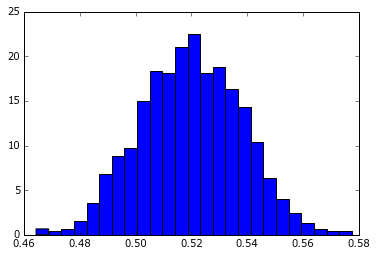

In [67]:
GCcontents_noconstraints = []
for seq in randseq_noconstraints:
    GCcontents_noconstraints.append(RSEF.get_GC_Freq(seq))
plt.hist(GCcontents_noconstraints, 25, normed=1)
plt.show()

To constrain the GC contents of the random sequences that are created?
This can be done in one of two ways:
1. using the add_GC function 
2. specifing the GC content on object initialization

In [68]:
#using the add_GC function
GC_constraints1 = SC.Sequence_Creator(50, 2000, 1000)
GC_constraints1.add_GC(0.56)
randseq_GCconstraints1 = GC_constraints1.make_random_sequences()

#specifing the GC content on object initialization
GC_constraints2 = SC.Sequence_Creator(50, 2000, 1000, GC=0.56)
randseq_GCconstraints2 = GC_constraints2.make_random_sequences()

Let's see how the GC contents of the seqeunces are distributed! 

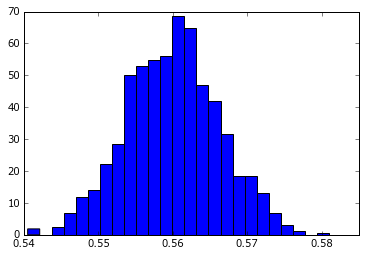

mean =  0.559987


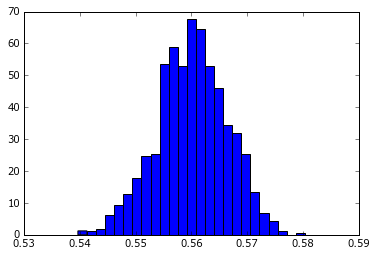

mean =  0.560085


In [69]:
GCcontents_GC_constraints1 = []
for seq in randseq_GCconstraints1:
    GCcontents_GC_constraints1.append(RSEF.get_GC_Freq(seq))
plt.hist(GCcontents_GC_constraints1, 25, normed=1)
plt.show()
print('mean = ', np.mean(GCcontents_GC_constraints1))

GCcontents_GC_constraints2 = []
for seq in randseq_GCconstraints2:
    GCcontents_GC_constraints2.append(RSEF.get_GC_Freq(seq))
plt.hist(GCcontents_GC_constraints2, 25, normed=1)
plt.show()
print('mean = ', np.mean(GCcontents_GC_constraints2))


Notice how the variance assoicated with the GC content of the sequences is much smaller when it is constrained, and the mean is at the specified GC content.

The amino acid content of the sequence can also be specified in a simliar fashion:
1. using the add_pAA function 
2. specifing the AA content on object initialization

In [70]:
# loading random AA distribution:
with open('./tutorial_data/AA.json', 'r') as f:
    AAfreq = json.load(f)

In [71]:
#using the add_GC function
AA_constraints1 = SC.Sequence_Creator(50, 2000, 1000)
AA_constraints1.add_pAA(AAfreq)
randseq_AAconstraints1 = AA_constraints1.make_random_sequences()

#specifing the GC content on object initialization
AA_constraints2 = SC.Sequence_Creator(50, 2000, 1000, AA=AAfreq)
randseq_AAconstraints2 = AA_constraints2.make_random_sequences()

Both amino acid content and GC content of the sequence can be specified in a simliar fashion:
1. using the add_pAA function and the add_GC function
2. specifing the AA content and GC content on object initialization

In [72]:
#using the add_GC function
AAGC_constraints1 = SC.Sequence_Creator(50, 2000, 1000)
AAGC_constraints1.add_pAA(AAfreq)
AAGC_constraints1.add_GC(0.56)
randseq_AAconstraints1 = AAGC_constraints1.make_random_sequences()

#specifing the GC content on object initialization
AAGC_constraints2 = SC.Sequence_Creator(50, 2000, 1000, AA=AAfreq, GC=0.56)
randseq_AAGCconstraints2 = AAGC_constraints2.make_random_sequences()